In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import random
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers


np.random.seed(0)

In [5]:
# Load data into dataframe
training_data_folder = 'data/asl_alphabet_train/asl_alphabet_train'
data = []

for folder in sorted(os.listdir(training_data_folder)):
    if (folder == 'del' or folder == 'nothing' or folder == 'space' , folder == ".DS_Store"):
      continue
    sub_folder = os.path.join(training_data_folder,folder)
    print(folder)
    files = [{'label':folder,'path':os.path.join(sub_folder, f)} for f in os.listdir(sub_folder) if os.path.isfile(os.path.join(sub_folder, f))]
    data += files

df = pd.DataFrame(data)

map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                  19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

# map_characters
order_list=('A',  'B',  'C', 'D', 'E',  'F', 'G', 'H',  'I',  'J', 
                   'K',  'L',  'M',  'N',  'O',  'P',  'Q',  'R',  'S', 
                 'T',  'U',  'V',  'W',  'X',  'Y',  'Z')

from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
hotEncodedLabels=lb.fit_transform(order_list)
hotEncodedLabels

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [6]:

train_dir="data/asl_alphabet_train/asl_alphabet_train"

map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
                  19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25}


order_list=('A',  'B',  'C', 'D', 'E',  'F', 'G', 'H',  'I',  'J', 
                   'K',  'L',  'M',  'N',  'O',  'P',  'Q',  'R',  'S', 
                 'T',  'U',  'V',  'W',  'X',  'Y',  'Z')


def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    num=0
    print("LOADING DATA FROM : ",end = "")
    for folder in sorted(os.listdir(train_dir)):
        if (folder == 'del' or folder == 'nothing' or folder == 'space' or folder == ".DS_Store"):
          continue
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            # temp_img = temp_img.flatten()
            images.append(temp_img)
            labels.append(num)
        num+=1
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.4, random_state=42)
    X_test, X_validation, Y_test, Y_validation = train_test_split(X_test, Y_test, test_size = 0.5,random_state=42)
    
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_validation),'images for validation','validation data shape =',X_validation.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)

    
    return X_train, X_test, Y_train, Y_test, X_validation, Y_validation

In [7]:
X_train, X_test, Y_train, Y_test, X_validation, Y_validation= load_data()

LOADING DATA FROM : A | B | C | D | E | F | G | H | I | J | K | L | M | N | O | P | Q | R | S | T | U | V | W | X | Y | Z | 
Loaded 46800 images for training, Train data shape = (46800, 64, 64, 3)
Loaded 15600 images for validation validation data shape = (15600, 64, 64, 3)
Loaded 15600 images for testing Test data shape = (15600, 64, 64, 3)


In [8]:
with tf.device('/CPU:0'):
    model = keras.models.Sequential()
   
    model.add(layers.Conv2D(8,(5,5), strides=(1,1), padding="valid", activation='relu', input_shape=(64,64,3)))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(16, 5, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(32,5, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(26))
    print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          12832     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [9]:
with tf.device('/CPU:0'):
    # loss and optimizer
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optim = keras.optimizers.Adam(lr=0.001)
    metrics = ["accuracy"]

In [10]:

with tf.device('/CPU:0'):
    model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [11]:
with tf.device('/CPU:0'):
    data_x=np.array(X_train)
    data_y=np.array(Y_train)

    val_x=np.array(X_validation)
    val_y=np.array(Y_validation)

    # training
    batch_size = 10
    epochs = 30
    model.fit(data_x, data_y, epochs=epochs, batch_size=batch_size, verbose=2)
    print("eval")
    model.evaluate(val_x,  val_y, batch_size=batch_size, verbose=2)
    
    epochs = 15
    optim = keras.optimizers.Adam(lr=0.0001)
    model.fit(data_x, data_y, epochs=epochs, batch_size=batch_size, verbose=2)
    print("eval")
    model.evaluate(val_x,  val_y, batch_size=batch_size, verbose=2)

    # evaulate

Epoch 1/30
4680/4680 - 29s - loss: 0.9743 - accuracy: 0.6915 - 29s/epoch - 6ms/step
Epoch 2/30
4680/4680 - 31s - loss: 0.2276 - accuracy: 0.9243 - 31s/epoch - 7ms/step
Epoch 3/30
4680/4680 - 34s - loss: 0.1334 - accuracy: 0.9561 - 34s/epoch - 7ms/step
Epoch 4/30
4680/4680 - 35s - loss: 0.1018 - accuracy: 0.9677 - 35s/epoch - 7ms/step
Epoch 5/30
4680/4680 - 35s - loss: 0.0847 - accuracy: 0.9740 - 35s/epoch - 8ms/step
Epoch 6/30
4680/4680 - 33s - loss: 0.0733 - accuracy: 0.9777 - 33s/epoch - 7ms/step
Epoch 7/30
4680/4680 - 33s - loss: 0.0719 - accuracy: 0.9791 - 33s/epoch - 7ms/step
Epoch 8/30
4680/4680 - 33s - loss: 0.0619 - accuracy: 0.9823 - 33s/epoch - 7ms/step
Epoch 9/30
4680/4680 - 31s - loss: 0.0689 - accuracy: 0.9828 - 31s/epoch - 7ms/step
Epoch 10/30
4680/4680 - 30s - loss: 0.0549 - accuracy: 0.9850 - 30s/epoch - 6ms/step
Epoch 11/30
4680/4680 - 28s - loss: 0.0642 - accuracy: 0.9843 - 28s/epoch - 6ms/step
Epoch 12/30
4680/4680 - 27s - loss: 0.0521 - accuracy: 0.9866 - 27s/epoch 

Epoch 1/15
4680/4680 - 29s - loss: 0.0529 - accuracy: 0.9917 - 29s/epoch - 6ms/step
Epoch 2/15
4680/4680 - 32s - loss: 0.0510 - accuracy: 0.9921 - 32s/epoch - 7ms/step
Epoch 3/15
4680/4680 - 33s - loss: 0.0533 - accuracy: 0.9910 - 33s/epoch - 7ms/step
Epoch 4/15
4680/4680 - 34s - loss: 0.0506 - accuracy: 0.9924 - 34s/epoch - 7ms/step
Epoch 5/15
4680/4680 - 33s - loss: 0.0527 - accuracy: 0.9924 - 33s/epoch - 7ms/step
Epoch 6/15
4680/4680 - 33s - loss: 0.0520 - accuracy: 0.9928 - 33s/epoch - 7ms/step
Epoch 7/15
4680/4680 - 31s - loss: 0.0533 - accuracy: 0.9932 - 31s/epoch - 7ms/step
Epoch 8/15
4680/4680 - 32s - loss: 0.0708 - accuracy: 0.9919 - 32s/epoch - 7ms/step
Epoch 9/15
4680/4680 - 33s - loss: 0.0596 - accuracy: 0.9926 - 33s/epoch - 7ms/step
Epoch 10/15
4680/4680 - 33s - loss: 0.0656 - accuracy: 0.9922 - 33s/epoch - 7ms/step
Epoch 11/15
4680/4680 - 32s - loss: 0.0541 - accuracy: 0.9937 - 32s/epoch - 7ms/step
Epoch 12/15
4680/4680 - 33s - loss: 0.0595 - accuracy: 0.9928 - 33s/epoch 

In [12]:
with tf.device('/CPU:0'):
    
    test_x=np.array(X_test)
    test_y=np.array(Y_test)
    
    
    print("test")
    
    model.evaluate(test_x,  test_y,verbose=2)
    mypred=model.predict(test_x)
    mypred=mypred.argmax(axis=1)

test
488/488 - 3s - loss: 0.2102 - accuracy: 0.9830 - 3s/epoch - 5ms/step
488/488 [==============================] - 3s 5ms/step


Confusion Matrix
[[567   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 580   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1   0 623   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [  1   0   0 598   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   3   0   0 591   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   1 619   0   0   1   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 627   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3 601   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0   1   4   0   1   0 579   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [

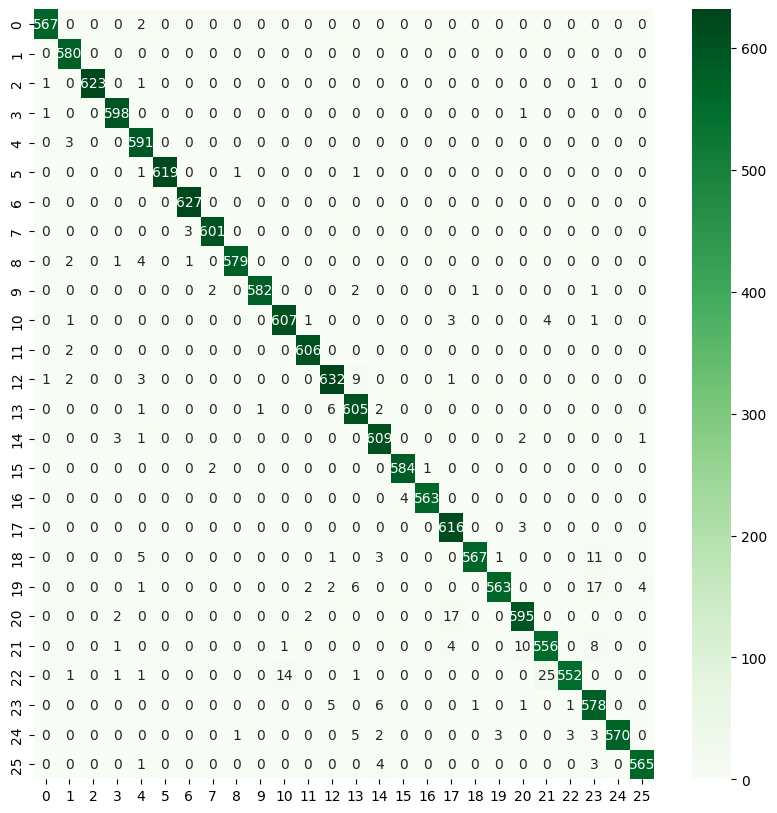

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# function to make pretty confusion matrix
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(10,10))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')






# create the cunfusion matrix
confussion_matrix(confusion_matrix(test_y,mypred))
print("Confusion Matrix")
print(confusion_matrix(test_y,mypred))

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
with tf.device('/CPU:0'):
  print('Accuracy score : ', accuracy_score(Y_test, mypred))
  print('Precision score : ', precision_score(Y_test, mypred, average='weighted'))
  print('Recall score : ',recall_score(Y_test,mypred, average='weighted'))
  print('F1 score : ', f1_score(Y_test,mypred, average='weighted'))

Accuracy score :  0.9830128205128205
Precision score :  0.9833000868433541
Recall score :  0.9830128205128205
F1 score :  0.9830145869187847


In [20]:
from sklearn.metrics import classification_report
with tf.device('/CPU:0'):
  print(classification_report(Y_test,mypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       569
           1       0.98      1.00      0.99       580
           2       1.00      1.00      1.00       626
           3       0.99      1.00      0.99       600
           4       0.97      0.99      0.98       594
           5       1.00      1.00      1.00       622
           6       0.99      1.00      1.00       627
           7       0.99      1.00      0.99       604
           8       1.00      0.99      0.99       587
           9       1.00      0.99      0.99       588
          10       0.98      0.98      0.98       617
          11       0.99      1.00      0.99       608
          12       0.98      0.98      0.98       648
          13       0.96      0.98      0.97       615
          14       0.97      0.99      0.98       616
          15       0.99      0.99      0.99       587
          16       1.00      0.99      1.00       567
          17       0.96    

In [30]:
def test_single_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32')/255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    prediction = np.argmax(prediction)
    return map_characters[prediction]

In [32]:
from tabulate import tabulate

def test_images(images):
    results = []
    for path, label in images:
        prediction = test_single_image(path)
        results.append((path, label, prediction))

    df = pd.DataFrame(results, columns=['Image Path', 'True Label', 'Predicted Label'])
    df = df.sort_values(by=['True Label', 'Predicted Label']) # Sorting
    return df

images = [
    ('./OurAlphabet/A.jpg', 'A'),
    ('./OurAlphabet/K.jpg', 'K'),
    ('./OurAlphabet/U.jpg', 'U'),
    ('./OurAlphabet/W.jpg', 'W'),
    ('./OurAlphabet/Z.jpg', 'Z')
]

df_results = test_images(images)
df_results = df_results.drop(columns=['Image Path'])  # Drop the 'Image Path' column

# Now print the dataframe in a tabular format
print(tabulate(df_results, headers='keys', tablefmt='psql', showindex=False))


1/1 [==============================] - 0s 10ms/step
+--------------+-------------------+
| True Label   | Predicted Label   |
|--------------+-------------------|
| A            | M                 |
| K            | K                 |
| U            | U                 |
| W            | W                 |
| Z            | Z                 |
+--------------+-------------------+


In [34]:
from tabulate import tabulate
import os

def test_images_in_folder(folder_path):
    results = []
    for file_name in sorted(os.listdir(folder_path)):
        if not file_name.endswith(".jpg") or file_name.startswith(".") or file_name.startswith("space") or file_name.startswith("nothing") or file_name.startswith("del"):
            continue
        image_path = os.path.join(folder_path, file_name)
        true_label = file_name[0]  # Get the true label from the first character of the filename
        prediction = test_single_image(image_path)
        results.append((true_label, prediction))
    df = pd.DataFrame(results, columns=['True Label', 'Predicted Label'])
    df = df.sort_values(by=['True Label', 'Predicted Label'])  # Sorting
    return df

folder_path = "data/asl_alphabet_test/asl_alphabet_test/"
df_results = test_images_in_folder(folder_path)

# Now print the dataframe in a tabular format
print(tabulate(df_results, headers='keys', tablefmt='psql', showindex=False))


1/1 [==============================] - 0s 11ms/step
+--------------+-------------------+
| True Label   | Predicted Label   |
|--------------+-------------------|
| A            | A                 |
| B            | B                 |
| C            | C                 |
| D            | D                 |
| E            | E                 |
| F            | F                 |
| G            | G                 |
| H            | H                 |
| I            | I                 |
| J            | J                 |
| K            | K                 |
| L            | L                 |
| M            | M                 |
| N            | N                 |
| O            | O                 |
| P            | P                 |
| Q            | Q                 |
| R            | R                 |
| S            | S                 |
| T            | T                 |
| U            | U                 |
| V            | V                 |
| W            | W     